In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D

## Single variable Linear Regression

### Step - 1 Get Data 

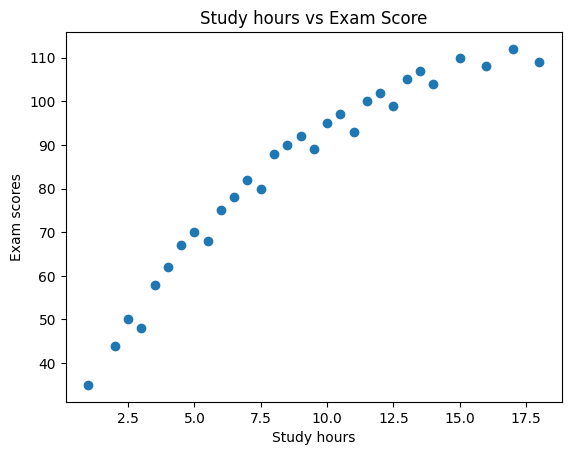

In [13]:
X_study_hours = np.array([
    1, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6,
    6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10, 10.5, 11,
    11.5, 12, 12.5, 13, 13.5, 14, 15, 16, 17, 18
]).reshape(-1,1)

Y_exam_scores = np.array([
    35, 44, 50, 48, 58, 62, 67, 70, 68, 75,
    78, 82, 80, 88, 90, 92, 89, 95, 97, 93,
    100, 102, 99, 105, 107, 104, 110, 108, 112, 109
]
 )




plt.scatter(X_study_hours,Y_exam_scores)
plt.ylabel("Exam scores")
plt.xlabel("Study hours")
plt.title("Study hours vs Exam Score")
plt.show()


### Step - 2 Perform Regression

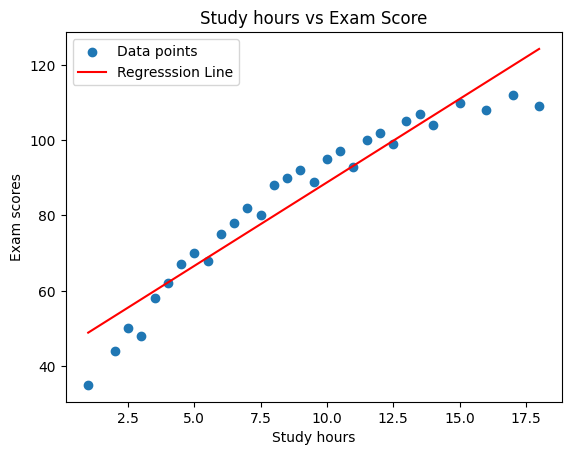

Root Mean Squared Error (RMSE): 6.30
R^2 Score: 0.91
Predicted exam score for 9 hours: 84.34


In [14]:
lin_reg = LinearRegression()

lin_reg.fit(X_study_hours,Y_exam_scores)

y_pred = lin_reg.predict(X_study_hours)

plt.scatter(X_study_hours,Y_exam_scores,label="Data points")
plt.plot(X_study_hours,y_pred,color='red',label="Regresssion Line")
plt.ylabel("Exam scores")
plt.xlabel("Study hours")
plt.legend()
plt.title("Study hours vs Exam Score")
plt.show()

mse = mean_squared_error(Y_exam_scores, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_exam_scores, y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")


hours = np.array([[9]])  # 9 hours of study
predicted_score = lin_reg.predict(hours)
print(f"Predicted exam score for {hours[0][0]} hours: {predicted_score[0]:.2f}")

### Multivariable Linear Regression 



Root Mean Squared Error (RMSE): 1.47
R^2 Score: 0.99
Predicted exam score for 9 study hours and 7 sleep hours: 90.16


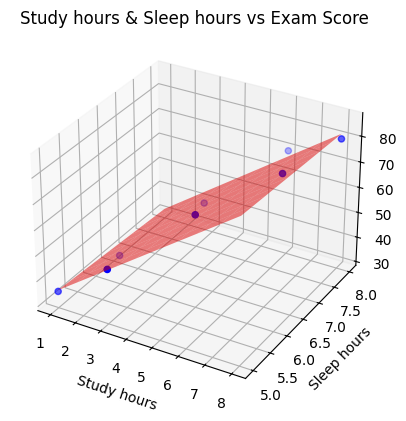

In [17]:

# [Study hours, Sleep hours]
X = np.array([
    [1, 5],
    [2, 6],
    [3, 5],
    [4, 7],
    [5, 6],
    [6, 8],
    [7, 7],
    [8, 8]
])

# Exam scores
Y = np.array([35, 40, 50, 55, 65, 70, 75, 80])


lin_reg = LinearRegression()
lin_reg.fit(X, Y)


y_pred = lin_reg.predict(X)


mse = mean_squared_error(Y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y, y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Predict a new value
new_data = np.array([[9, 7]])  # 9 study hours, 7 sleep hours
predicted_score = lin_reg.predict(new_data)
print(f"Predicted exam score for {new_data[0][0]} study hours and {new_data[0][1]} sleep hours: {predicted_score[0]:.2f}")


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y, color='blue', label="Data points")
ax.set_xlabel("Study hours")
ax.set_ylabel("Sleep hours")
ax.set_zlabel("Exam scores")
ax.set_title("Study hours & Sleep hours vs Exam Score")

# Create grid for plane
study_range = np.linspace(X[:,0].min(), X[:,0].max(), 10)
sleep_range = np.linspace(X[:,1].min(), X[:,1].max(), 10)
study_grid, sleep_grid = np.meshgrid(study_range, sleep_range)
pred_grid = lin_reg.predict(np.c_[study_grid.ravel(), sleep_grid.ravel()]).reshape(study_grid.shape)

# Plot regression plane
ax.plot_surface(study_grid, sleep_grid, pred_grid, color='red', alpha=0.5, label="Regression Plane")
plt.show()
